# Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\Yashoda\Downloads\Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Cleaning (Drop irrelevant )

In [4]:
columns_to_drop = ['Restaurant ID', 'Address', 'Phone Number', 'Menu', 'Dish_Liked', 'Reviews']

df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True, errors='ignore')

df = df.dropna(subset=['Cuisines'])

df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

df.fillna({'Price range': df['Price range'].mode()[0],
           'Votes': df['Votes'].median(),
           'Aggregate rating': df['Aggregate rating'].median()}, inplace=True)

# Encode categorical variables (except 'Cuisines')

In [5]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns.remove('Cuisines')  # Target variable

df = pd.get_dummies(df, columns=categorical_columns)

# Encode target variable 'Cuisines'

In [6]:
le = LabelEncoder()
df['Cuisine_Label'] = le.fit_transform(df['Cuisines'])

#  Split dataset

In [7]:
X = df.drop(columns=['Cuisines', 'Cuisine_Label'])
y = df['Cuisine_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model

In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate

In [9]:
y_pred = model.predict(X_test)

labels_in_test = unique_labels(y_test, y_pred)
target_names = le.inverse_transform(labels_in_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, labels=labels_in_test, target_names=target_names,zero_division=0))

Classification Report:

                 precision    recall  f1-score   support

        Afghani       0.00      0.00      0.00         1
       American       0.34      0.51      0.41        55
         Andhra       0.00      0.00      0.00         1
        Arabian       0.00      0.00      0.00         0
          Asian       0.00      0.00      0.00        17
   Asian Fusion       0.00      0.00      0.00         1
            BBQ       0.00      0.00      0.00         5
         Bakery       0.29      0.13      0.18       109
       Bar Food       0.00      0.00      0.00         6
        Bengali       0.00      0.00      0.00         4
      Beverages       0.86      0.46      0.60        13
        Biryani       0.50      0.05      0.08        22
      Brazilian       0.38      0.75      0.50         4
      Breakfast       0.00      0.00      0.00         3
        British       0.00      0.00      0.00         4
         Burger       0.64      0.45      0.53        31
      

# Confusion Matrix (Top 10 Cuisines)

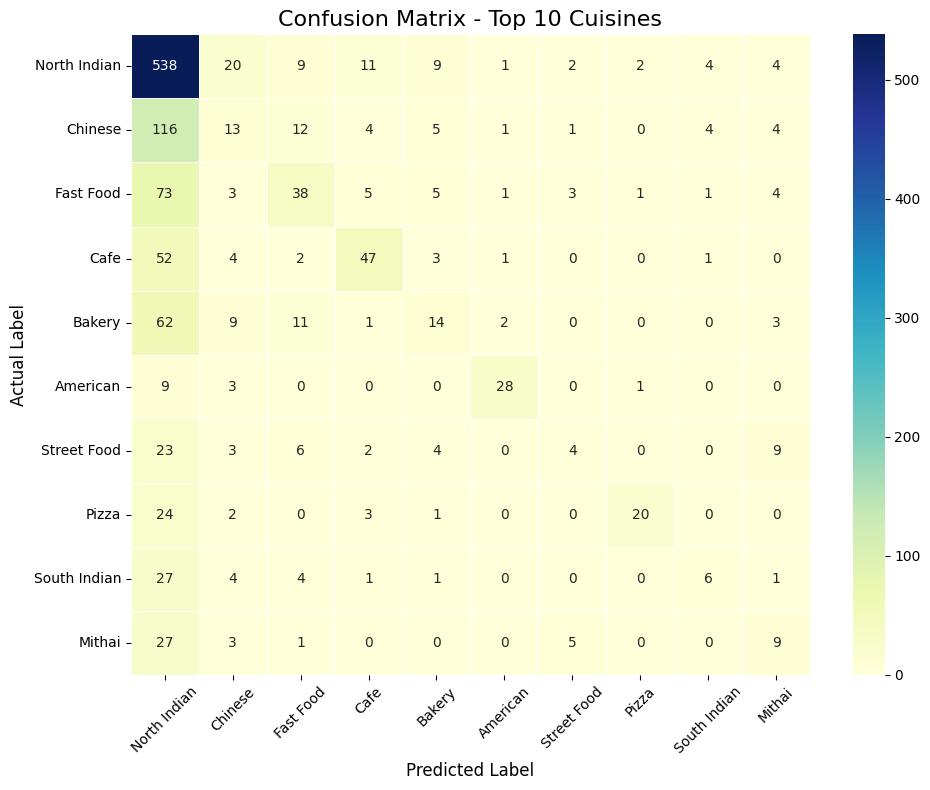

In [10]:
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

top_n = 10
top_classes = pd.Series(y_test_labels).value_counts().nlargest(top_n).index.tolist()

filtered_indices = [i for i, label in enumerate(y_test_labels) if label in top_classes]
filtered_y_test = [y_test_labels[i] for i in filtered_indices]
filtered_y_pred = [y_pred_labels[i] for i in filtered_indices]

conf_matrix = confusion_matrix(filtered_y_test, filtered_y_pred, labels=top_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, 
            xticklabels=top_classes, 
            yticklabels=top_classes,
            annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)

plt.title(f'Confusion Matrix - Top {top_n} Cuisines', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()